In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

In [55]:
# Define HPC systems and their performance metrics
hpc_data = {
    'HPC1': {'iteration_speed': 90, 'calculation_speed': 120, 'memory_bandwidth': 150, 'network_latency': 10},
    'HPC2': {'iteration_speed': 120, 'calculation_speed': 80, 'memory_bandwidth': 100, 'network_latency': 15},
    'HPC3': {'iteration_speed': 100, 'calculation_speed': 100, 'memory_bandwidth': 120, 'network_latency': 12},
    'HPC4': {'iteration_speed': 110, 'calculation_speed': 90, 'memory_bandwidth': 110, 'network_latency': 8},
    'HPC5': {'iteration_speed': 95, 'calculation_speed': 110, 'memory_bandwidth': 130, 'network_latency': 11}
}

In [58]:
# Convert HPC data to a DataFrame with id
df = pd.DataFrame.from_dict(hpc_data, orient='index')
df = df.rename_axis('title').reset_index()
df.head()

,title,iteration_speed,calculation_speed,memory_bandwidth,network_latency
0,HPC1,90,120,150,10
1,HPC2,120,80,100,15
2,HPC3,100,100,120,12
3,HPC4,110,90,110,8
4,HPC5,95,110,130,11


In [60]:
df.iloc[:, 1:]

,iteration_speed,calculation_speed,memory_bandwidth,network_latency
0,90,120,150,10
1,120,80,100,15
2,100,100,120,12
3,110,90,110,8
4,95,110,130,11


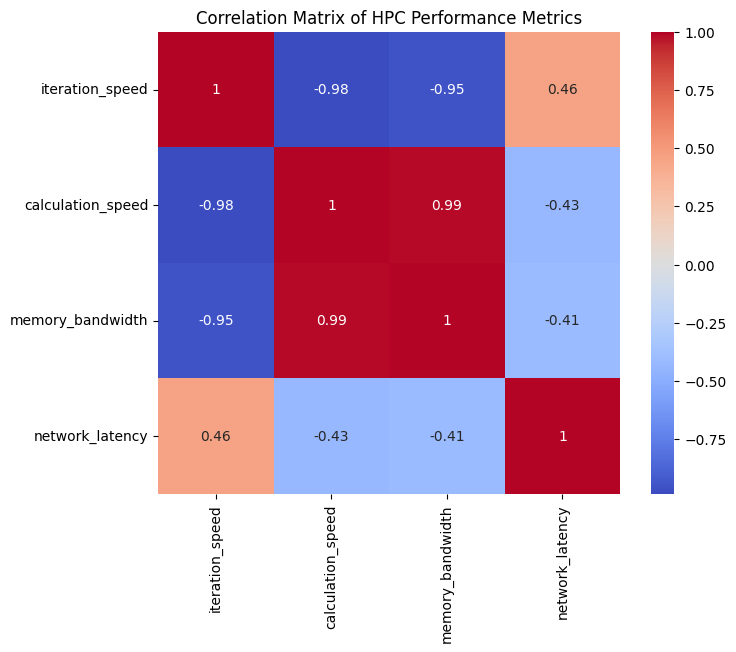

In [61]:
# Correlation analysis of only numeric columns
corr_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of HPC Performance Metrics')
plt.show()

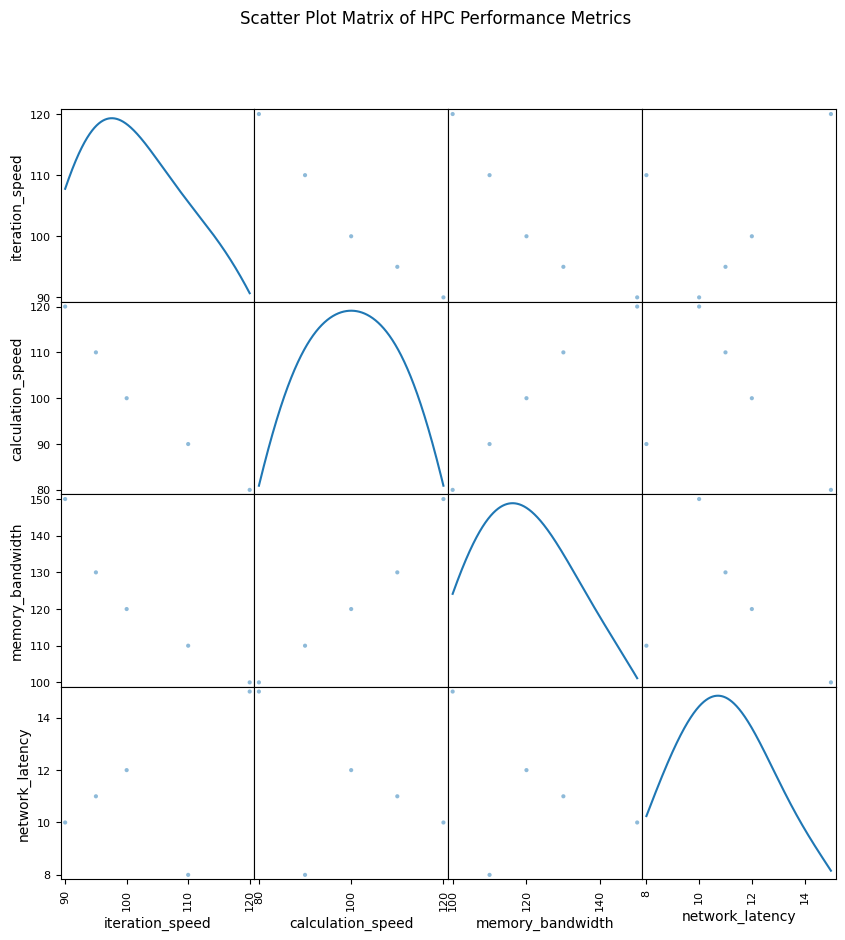

In [62]:
# Scatter plot matrix
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of HPC Performance Metrics')
plt.show()

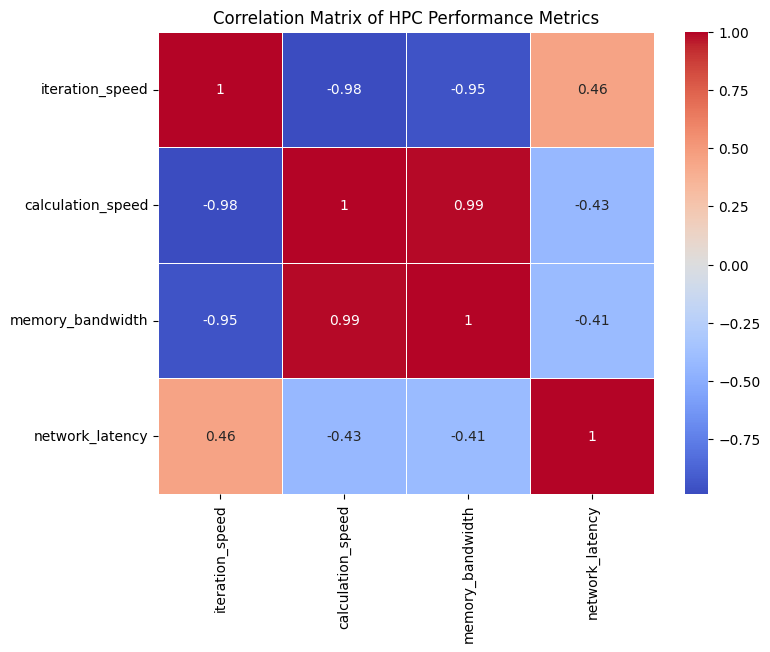

In [63]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of HPC Performance Metrics')
plt.show()

In [69]:
df.columns

Index(['title', 'iteration_speed', 'calculation_speed', 'memory_bandwidth',
       'network_latency'],
      dtype='object')

In [72]:
titles = df['title'].unique()
titles

array(['HPC1', 'HPC2', 'HPC3', 'HPC4', 'HPC5'], dtype=object)

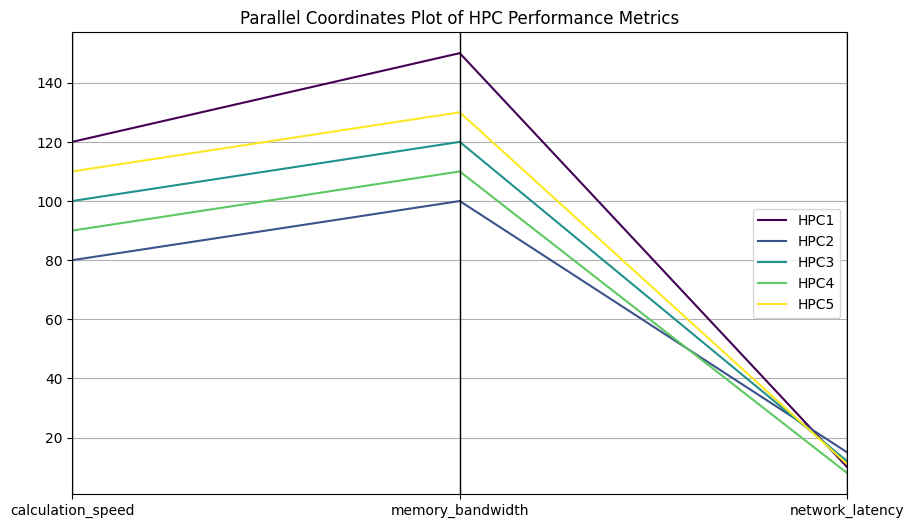

In [76]:
# Parallel coordinates plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df.iloc[:,1:], 'iteration_speed', colormap='viridis')
plt.title('Parallel Coordinates Plot of HPC Performance Metrics')

plt.legend(df['title'], loc='center right')

plt.show()

In [37]:
df.columns

Index(['iteration_speed', 'calculation_speed', 'memory_bandwidth',
       'network_latency'],
      dtype='object')

In [77]:
# Radar chart
metrics = ['iteration_speed', 'calculation_speed', 'memory_bandwidth', 'network_latency']
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

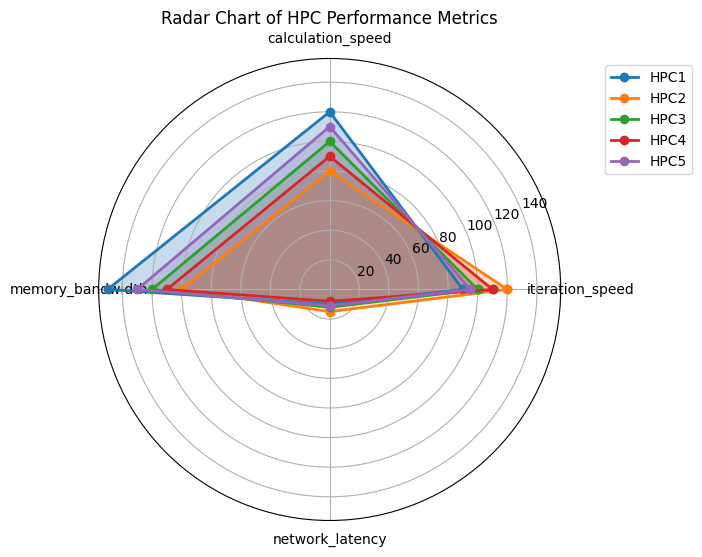

In [78]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for hpc, values in hpc_data.items():
    values = np.array(list(values.values()))
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=hpc)
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, metrics)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Radar Chart of HPC Performance Metrics')
plt.show()

In [79]:
# Statistical analysis
stats_df = df.describe()
print("Statistical Summary of HPC Performance Metrics:")
print(stats_df)

Statistical Summary of HPC Performance Metrics:
       iteration_speed  calculation_speed  memory_bandwidth  network_latency
count         5.000000           5.000000          5.000000         5.000000
mean        103.000000         100.000000        122.000000        11.200000
std          12.041595          15.811388         19.235384         2.588436
min          90.000000          80.000000        100.000000         8.000000
25%          95.000000          90.000000        110.000000        10.000000
50%         100.000000         100.000000        120.000000        11.000000
75%         110.000000         110.000000        130.000000        12.000000
max         120.000000         120.000000        150.000000        15.000000


In [80]:
# Pairwise correlation coefficients
print("\nPairwise Correlation Coefficients:")
for metric1 in metrics:
    for metric2 in metrics:
        if metric1 != metric2:
            corr, _ = pearsonr(df[metric1], df[metric2])
            print(f"Correlation between {metric1} and {metric2}: {corr:.2f}")


Pairwise Correlation Coefficients:
Correlation between iteration_speed and calculation_speed: -0.98
Correlation between iteration_speed and memory_bandwidth: -0.95
Correlation between iteration_speed and network_latency: 0.46
Correlation between calculation_speed and iteration_speed: -0.98
Correlation between calculation_speed and memory_bandwidth: 0.99
Correlation between calculation_speed and network_latency: -0.43
Correlation between memory_bandwidth and iteration_speed: -0.95
Correlation between memory_bandwidth and calculation_speed: 0.99
Correlation between memory_bandwidth and network_latency: -0.41
Correlation between network_latency and iteration_speed: 0.46
Correlation between network_latency and calculation_speed: -0.43
Correlation between network_latency and memory_bandwidth: -0.41


In [81]:
# Performance comparison
avg_performance = df.mean(axis=1)
best_hpc = avg_performance.idxmax()
print(f"\nBest performing HPC system: {best_hpc}")

TypeError: can only concatenate str (not "int") to str

In [ ]:
# Benchmark comparison
benchmark_data = {
    'LINPACK': {'HPC1': 95, 'HPC2': 90, 'HPC3': 98, 'HPC4': 92, 'HPC5': 96},
    'HPCG': {'HPC1': 85, 'HPC2': 88, 'HPC3': 92, 'HPC4': 90, 'HPC5': 87}
}

In [82]:
benchmark_df = pd.DataFrame.from_dict(benchmark_data)
benchmark_df.index.name = 'HPC System'

In [83]:
benchmark_df

,LINPACK,HPCG
HPC System,,
HPC1,95,85
HPC2,90,88
HPC3,98,92
HPC4,92,90
HPC5,96,87


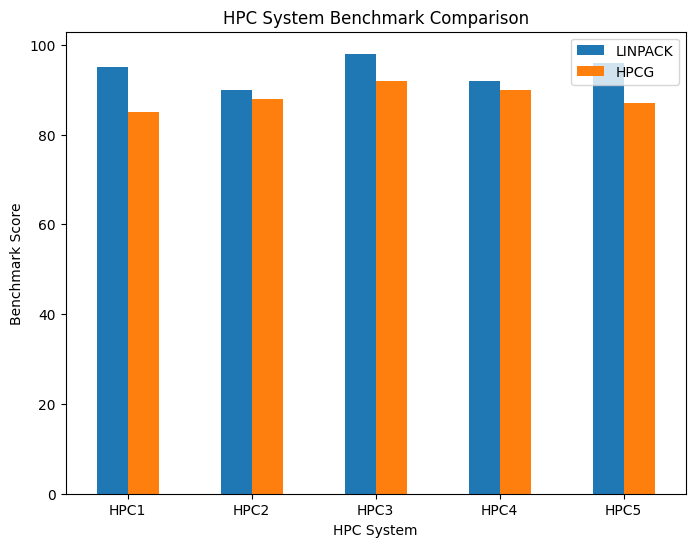

In [84]:
# Visualization of benchmark results
benchmark_df.plot(kind='bar', figsize=(8, 6), rot=0)
plt.xlabel('HPC System')
plt.ylabel('Benchmark Score')
plt.title('HPC System Benchmark Comparison')
plt.show()